In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2
from haversine import haversine, Unit
import requests

In [2]:
main_df = pd.read_csv('../src/temp_merged_2025_working.csv')

In [3]:
stations_url = "https://data.cityofnewyork.us/resource/hc8x-tcnd.json?$limit=60000"
stations_raw = requests.get(stations_url).json()
stations = pd.DataFrame(stations_raw)

In [4]:
stations

,facilityname,facilityaddress,borough,postcode,latitude,longitude,community_board,community_council,census_tract,bin,bbl,nta
0,Engine 4/Ladder 15,42 South Street,Manhattan,10005,40.703694,-74.007717,101,1,7,1000867,1000350001,Battery Park City-Lower Manhattan
1,Engine 6,49 Beekman Street,Manhattan,10038,40.709971,-74.005395,101,1,1501,1001287,1000930030,Battery Park City-Lower Manhattan
2,Manhattan Borough Command/Battalion 1/Engine 7...,100 Duane Street,Manhattan,10007,40.715339,-74.0063,101,1,33,1001647,1001500025,SoHo-TriBeCa-Civic Center-Little Italy
3,Ladder 8,14 N. Moore Street,Manhattan,10013,40.719574,-74.00662,101,1,33,1002150,1001890035,SoHo-TriBeCa-Civic Center-Little Italy
4,Engine 9/Ladder 6,75 Canal Street,Manhattan,10002,40.715408,-73.992834,103,1,16,1003898,1003000030,Chinatown
...,...,...,...,...,...,...,...,...,...,...,...,...
214,Engine 167/Ladder 87,345 Annadale Road,Staten Island,10312,40.554191,-74.175479,503,51,17012,5075428,5056420006,Annadale-Huguenot-Prince's Bay-Eltingville
215,Engine 164/Ladder 84,1560 Drumgoole Road West,Staten Island,10312,40.535418,-74.196059,503,51,20804,5083491,5068280065,Rossville-Woodrow
216,Engine 151/Ladder 76,7219 Amboy Road,Staten Island,10307,40.512739,-74.23895,503,51,248,5089056,5080400010,Charleston-Richmond Valley-Tottenville
217,Engine 168,1100 Rossville Ave,Staten Island,10309,40.553942,-74.213083,503,51,20801,5154879,5070670252,Rossville-Woodrow


# ok step back here i have latitude and longitude on where the station is and the zip code on where the call was

In [5]:
zipcode = main_df['zipcode'].unique()
print(zipcode)
# the list of zip codes plus the null
print(sorted(zipcode))

[11224 10001 10036 10040 10466 10314 10025 11218 10003 11214 10459 10457
 11235 11435 10019 11210 10035     0 10475 10018 10002 11225 11216 11692
 10037 10454 11207 11432 11222 10028 10017 11208 11102 10304 11213 11361
 10468 11233 11004 11417 10038 11433 10469 10013 11237 11234 10014 10033
 10456 10026 11211 11221 11415 11223 10009 10453 11357 11103 11106 11691
 11373 10460 11101 10473 10472 11206 11385 10023 11354 10467 11217 10451
 11203 11226 11419 11368 10309 10462 11220 11236 11209 11201 10016 11413
 11232 10303 11360 10310 10465 10128 10011 10458 11040 11229 11430 10463
 10452 11215 10032 11434 10012 10024 11369 11205 10461 10022 11212 11358
 10471 11231 10021 11422 10027 11219 11694 11375 10308 11377 11249 10031
 11367 11414 10034 10007 10029 11420 10105 11412 10006 11355 11418 10020
 11436 11421 11204 11374 10455 11428 10065 11238 10010 12345 11429 10306
 10004 10307 11416 11105 11370 10301 11372 10030 11378 10312 10075 10305
 10474 11426 11423 10005 10280 11005 11109 10470 10

manually covert zipcodes to find lat and long

In [6]:
#new york zipcode coordinates looked up by  #https://www.freemaptools.com/convert-us-zip-code-to-lat-lng.htm
nyc_zipcode = {
    # Manhattan
    10001: (40.7506, -73.9971), 10002: (40.7156, -73.9862), 10003: (40.7318, -73.9885),
    10004: (40.7048, -74.0133), 10005: (40.7061, -74.0087), 10006: (40.7090, -74.0130),
    10007: (40.7134, -74.0075), 10009: (40.7264, -73.9783), 10010: (40.7393, -73.9817),
    10011: (40.7405, -74.0015), 10012: (40.7255, -73.9983), 10013: (40.7199, -74.0048),
    10014: (40.7341, -74.0065), 10016: (40.7458, -73.9784), 10017: (40.7520, -73.9733),
    10018: (40.7553, -73.9933), 10019: (40.7655, -73.9879), 10020: (40.7586, -73.9787),
    10021: (40.7691, -73.9589), 10022: (40.7577, -73.9691), 10023: (40.7765, -73.9815),
    10024: (40.7914, -73.9743), 10025: (40.7981, -73.9654), 10026: (40.8023, -73.9524),
    10027: (40.8116, -73.9534), 10028: (40.7763, -73.9533), 10029: (40.7917, -73.9438),
    10030: (40.8182, -73.9431), 10031: (40.8249, -73.9497), 10032: (40.8382, -73.9426),
    10033: (40.8500, -73.9343), 10034: (40.8670, -73.9238), 10035: (40.7957, -73.9297),
    10036: (40.7590, -73.9899), 10037: (40.8132, -73.9372), 10038: (40.7093, -74.0026),
    10039: (40.8264, -73.9363), 10040: (40.8583, -73.9301), 10044: (40.7615, -73.9502),
    10065: (40.7644, -73.9635), 10075: (40.7710, -73.9565), 10121: (40.7114, -74.0098),
    10128: (40.7813, -73.9502), 10282: (40.7158, -74.0145),
    
    # Bronx, NY
    10451: (40.8234, -73.9251), 10452: (40.8406, -73.9184), 10453: (40.8529, -73.9121),
    10454: (40.8056, -73.9183), 10455: (40.8154, -73.9092), 10456: (40.8282, -73.9091),
    10457: (40.8469, -73.8976), 10458: (40.8623, -73.8880), 10459: (40.8263, -73.8926),
    10460: (40.8421, -73.8795), 10461: (40.8479, -73.8429), 10462: (40.8469, -73.8608),
    10463: (40.8799, -73.9067), 10464: (40.8668, -73.7951), 10465: (40.8274, -73.8221),
    10466: (40.8899, -73.8466), 10467: (40.8736, -73.8721), 10468: (40.8680, -73.8993),
    10469: (40.8687, -73.8463), 10470: (40.8896, -73.8673), 10471: (40.8985, -73.9006),
    10472: (40.8298, -73.8736), 10473: (40.8181, -73.8583), 10474: (40.8107, -73.8876),
    10475: (40.8779, -73.8250),
    
    # Brooklyn, NY
    11201: (40.6945, -73.9896), 11203: (40.6498, -73.9342), 11204: (40.6184, -73.9844),
    11205: (40.6944, -73.9665), 11206: (40.7018, -73.9424), 11207: (40.6709, -73.8943),
    11208: (40.6695, -73.8718), 11209: (40.6216, -74.0302), 11210: (40.6277, -73.9466),
    11211: (40.7127, -73.9530), 11212: (40.6627, -73.9137), 11213: (40.6710, -73.9360),
    11214: (40.5993, -73.9962), 11215: (40.6627, -73.9863), 11216: (40.6807, -73.9495),
    11217: (40.6827, -73.9795), 11218: (40.6441, -73.9759), 11219: (40.6321, -73.9965),
    11220: (40.6406, -74.0165), 11221: (40.6912, -73.9273), 11222: (40.7282, -73.9475),
    11223: (40.5971, -73.9735), 11224: (40.5771, -73.9881), 11225: (40.6631, -73.9549),
    11226: (40.6463, -73.9565), 11228: (40.6163, -74.0132), 11229: (40.6000, -73.9444),
    11230: (40.6226, -73.9655), 11231: (40.6781, -74.0053), 11232: (40.6565, -74.0084),
    11233: (40.6779, -73.9200), 11234: (40.6067, -73.9089), 11235: (40.5843, -73.9493),
    11236: (40.6396, -73.9007), 11237: (40.7042, -73.9208), 11238: (40.6789, -73.9636),
    11239: (40.6473, -73.8789), 11249: (40.7154, -73.9595),
    
    # Queens, NY
    11101: (40.7504, -73.9393), 11102: (40.7717, -73.9260), 11103: (40.7629, -73.9131),
    11104: (40.7446, -73.9207), 11105: (40.7789, -73.9065), 11106: (40.7622, -73.9308),
    11354: (40.7677, -73.8265), 11355: (40.7524, -73.8236), 11356: (40.7851, -73.8414),
    11357: (40.7867, -73.8088), 11358: (40.7605, -73.7993), 11359: (40.7922, -73.7771),
    11360: (40.7824, -73.7794), 11361: (40.7641, -73.7738), 11362: (40.7571, -73.7365),
    11363: (40.7730, -73.7708), 11364: (40.7453, -73.7629), 11365: (40.7399, -73.7949),
    11366: (40.7285, -73.7937), 11367: (40.7295, -73.8256), 11368: (40.7513, -73.8555),
    11369: (40.7636, -73.8727), 11370: (40.7644, -73.8933), 11371: (40.7735, -73.8791),
    11372: (40.7512, -73.8914), 11373: (40.7387, -73.8786), 11374: (40.7261, -73.8612),
    11375: (40.7214, -73.8447), 11377: (40.7447, -73.9052), 11378: (40.7244, -73.9094),
    11379: (40.7161, -73.8804), 11385: (40.7003, -73.8816), 11411: (40.6939, -73.7363),
    11412: (40.6987, -73.7604), 11413: (40.6721, -73.7527), 11414: (40.6595, -73.8443),
    11415: (40.7076, -73.8285), 11416: (40.6854, -73.8517), 11417: (40.6775, -73.8447),
    11418: (40.7002, -73.8309), 11419: (40.6887, -73.8215), 11420: (40.6748, -73.8314),
    11421: (40.6940, -73.8584), 11422: (40.6603, -73.7364), 11423: (40.7164, -73.7694),
    11426: (40.7363, -73.7235), 11427: (40.7285, -73.7432), 11428: (40.7199, -73.7425),
    11429: (40.7085, -73.7435), 11430: (40.6506, -73.7889), 11432: (40.7146, -73.7938),
    11433: (40.6977, -73.7869), 11434: (40.6764, -73.7757), 11435: (40.7066, -73.8091),
    11436: (40.6768, -73.7889), 11691: (40.6013, -73.7565), 11692: (40.5924, -73.7898),
    11693: (40.5976, -73.8054), 11694: (40.5783, -73.8444), 11697: (40.5847, -73.8436),
    11109: (40.7433, -73.9538),
    
    # Staten Island, NY
    10301: (40.6336, -74.0955), 10302: (40.6288, -74.1423), 10303: (40.6294, -74.1776),
    10304: (40.6050, -74.0931), 10305: (40.5992, -74.0753), 10306: (40.5675, -74.1357),
    10307: (40.5070, -74.2426), 10308: (40.5554, -74.1510), 10309: (40.5330, -74.2213),
    10310: (40.6331, -74.1157), 10312: (40.5448, -74.1792), 10314: (40.5993, -74.1656),
    
    # Nassau (border areas)
    11001: (40.7371, -73.7117), 11004: (40.7453, -73.7116), 11005: (40.7528, -73.7197),
    11040: (40.7442, -73.7705),}


zipcode_df = pd.DataFrame([{'zipcode': int(z), 'latitude_of_call': lat, 'longitude_of_call': lon} for z, (lat, lon) in nyc_zipcode.items()])


In [7]:
zipcode_df

,zipcode,latitude_of_call,longitude_of_call
0,10001,40.7506,-73.9971
1,10002,40.7156,-73.9862
2,10003,40.7318,-73.9885
3,10004,40.7048,-74.0133
4,10005,40.7061,-74.0087
...,...,...,...
179,10314,40.5993,-74.1656
180,11001,40.7371,-73.7117
181,11004,40.7453,-73.7116
182,11005,40.7528,-73.7197


In [8]:
main_df = main_df.merge(zipcode_df, on='zipcode', how='left')

In [9]:
main_df[['zipcode', 'latitude_of_call', 'longitude_of_call']].isna().sum()

zipcode                  0
latitude_of_call     38744
longitude_of_call    38744
dtype: int64

In [10]:
# couldnt fix these

In [11]:
main_df.columns

Index(['incident_id', 'datetime', 'initial_type', 'initial_severity',
       'final_type', 'final_severity', 'assignment_time',
       'valid_dispatch_response', 'dispatch_response_sec', 'activation_time',
       'on_scene_time', 'valid_incident_response', 'travel_time_sec',
       'close_time', 'held', 'disposition', 'borough', 'dispatch_area',
       'zipcode', 'precinct', 'council_district', 'community_district',
       'school_district', 'congressional_district', 'reopened',
       'special_events', 'standby', 'transferred', 'incident_response_sec',
       'to_hospital_time', 'hospital_arrival_time', 'year', 'month', 'day',
       'week_day', 'hour', 'is_weekend', 'is_rush_hour', 'time_of_day',
       'season', 'is_holiday', 'datetime_hour', 'datetime_weather',
       'temperture', 'precipitation', 'windspeed', 'weathercode',
       'latitude_of_call', 'longitude_of_call'],
      dtype='object')

In [12]:
main_df

,incident_id,datetime,initial_type,initial_severity,final_type,final_severity,assignment_time,valid_dispatch_response,dispatch_response_sec,activation_time,...,season,is_holiday,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,latitude_of_call,longitude_of_call
0,250010001,2025-01-01 00:00:12,STNDBY,8,STNDBY,8,2025-01-01T09:53:41.000,N,0,2025-01-01T09:57:09.000,...,winter,1,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.5771,-73.9881
1,250010003,2025-01-01 00:01:53,UNC,2,UNC,2,2025-01-01T00:02:06.000,Y,13,2025-01-01T00:02:43.000,...,winter,1,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.7506,-73.9971
2,250010004,2025-01-01 00:01:58,CARD,3,CARD,3,2025-01-01T00:01:58.000,Y,0,2025-01-01T00:01:58.000,...,winter,1,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.7590,-73.9899
3,250010007,2025-01-01 00:03:42,ABDPN,5,ABDPN,5,2025-01-01T00:03:59.000,Y,17,2025-01-01T00:04:12.000,...,winter,1,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.8583,-73.9301
4,250010008,2025-01-01 00:04:36,STATEP,2,STATEP,2,2025-01-01T00:05:06.000,Y,30,2025-01-01T00:05:18.000,...,winter,1,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.8899,-73.8466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616879,243660980,2024-12-31 06:22:21,EDP,7,EDPC,7,NaN,N,0,NaN,...,winter,0,2024-12-31 06:00:00,2024-12-31 06:00:00,41.8,0.0,8.6,0,40.8469,-73.8976
1616880,243660981,2024-12-31 06:22:47,SICK,6,SICK,6,2024-12-31T06:22:56.000,Y,9,2024-12-31T06:23:14.000,...,winter,0,2024-12-31 06:00:00,2024-12-31 06:00:00,41.8,0.0,8.6,0,40.6945,-73.9896
1616881,243660982,2024-12-31 06:23:03,DIFFBR,2,DIFFBR,2,2024-12-31T06:23:24.000,Y,21,2024-12-31T06:24:08.000,...,winter,0,2024-12-31 06:00:00,2024-12-31 06:00:00,41.8,0.0,8.6,0,40.8899,-73.8466
1616882,243660983,2024-12-31 06:23:50,EDP,7,EDPM,7,NaN,N,0,NaN,...,winter,0,2024-12-31 06:00:00,2024-12-31 06:00:00,41.8,0.0,8.6,0,40.8899,-73.8466


In [13]:
stations.columns

Index(['facilityname', 'facilityaddress', 'borough', 'postcode', 'latitude',
       'longitude', 'community_board', 'community_council', 'census_tract',
       'bin', 'bbl', 'nta'],
      dtype='object')

# The secret formula for distance

# the numpy way

In [14]:
# example from internet 
import numpy as np
from math import radians

def manhattan_distance_miles(lat1, lon1, lat2, lon2):
    """
    Calculate the Manhattan distance between two geographic points in miles.

    Args:
        lat1 (float): Latitude of point 1.
        lon1 (float): Longitude of point 1.
        lat2 (float): Latitude of point 2.
        lon2 (float): Longitude of point 2.

    Returns:
        float: The Manhattan distance in miles.
    """
    # Earth's radius in miles
    R = 3958.8

    # Convert degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Calculate differences
    d_lat = lat2_rad - lat1_rad
    d_lon = lon2_rad - lon1_rad

    # Calculate the latitude distance
    # We use a simplified Haversine for just the latitude difference
    a_lat = np.sin(d_lat / 2.0)**2
    c_lat = 2 * np.arctan2(np.sqrt(a_lat), np.sqrt(1 - a_lat))
    distance_lat = R * c_lat

    # Calculate the longitude distance
    # We use a simplified Haversine for just the longitude difference,
    # considering the change in curvature by using the average of the two latitudes' cosines
    a_lon = np.sin(d_lon / 2.0)**2
    c_lon = 2 * np.arctan2(np.sqrt(a_lon), np.sqrt(1 - a_lon))
    distance_lon = R * c_lon * np.cos((lat1_rad + lat2_rad) / 2.0) # Adjust for longitude convergence

    # Manhattan distance is the sum of absolute latitude and longitude distances
    manhattan_dist = abs(distance_lat) + abs(distance_lon)

    return manhattan_dist

# Example Usage:
# Coordinates for Empire State Building, NYC (approx) and a point in New Jersey (approx)
# lat1, lon1 = 40.748817, -73.985428 
# lat2, lon2 = 40.712776, -74.005974 
# distance = manhattan_distance_miles(lat1, lon1, lat2, lon2)
# print(f"Manhattan Distance: {distance:.2f} miles")



# signifier on which 
# i need distance and who the responders where 
# model needs whos responding and how far they were

#Point 1 = [latitude_of_call, longitude_of_call]  the location of the EMS call

#Point 2 = [latitude, longitude]  the location of one station

In [15]:
main_df.columns

Index(['incident_id', 'datetime', 'initial_type', 'initial_severity',
       'final_type', 'final_severity', 'assignment_time',
       'valid_dispatch_response', 'dispatch_response_sec', 'activation_time',
       'on_scene_time', 'valid_incident_response', 'travel_time_sec',
       'close_time', 'held', 'disposition', 'borough', 'dispatch_area',
       'zipcode', 'precinct', 'council_district', 'community_district',
       'school_district', 'congressional_district', 'reopened',
       'special_events', 'standby', 'transferred', 'incident_response_sec',
       'to_hospital_time', 'hospital_arrival_time', 'year', 'month', 'day',
       'week_day', 'hour', 'is_weekend', 'is_rush_hour', 'time_of_day',
       'season', 'is_holiday', 'datetime_hour', 'datetime_weather',
       'temperture', 'precipitation', 'windspeed', 'weathercode',
       'latitude_of_call', 'longitude_of_call'],
      dtype='object')

In [16]:
def manhattan_distance(point1, point2):
    lat1, long1 = point1
    lat2, long2 = point2

    miles_per_lat = 69
    miles_per_long = 52

    distance = abs(lat1 - lat2)* miles_per_lat + abs(long1 - long2)* miles_per_long
    return distance

call_lats = main_df['latitude_of_call'].values
call_long = main_df['longitude_of_call'].values

call_point = [40.7128, -74.0060]   # test
station_point = [40.7306, -73.9352]  # test

distance_miles = manhattan_distance(call_point, station_point)
print(f"Manhattan distance: {distance_miles:.2f} miles")

Manhattan distance: 4.91 miles


In [20]:
def manhattan_distance(point1, point2):
    lat1, long1 = point1
    lat2, long2 = point2

    miles_per_lat = 69
    miles_per_long = 52

    distance = abs(lat1 - lat2)* miles_per_lat + abs(long1 - long2)* miles_per_long
    return distance
# the calls
call_lats = main_df['latitude_of_call'].values
call_lons = main_df['longitude_of_call'].values

# the station
station_lats = stations['latitude'].values
station_lons = stations['longitude'].values
station_name = stations['facilityname'].values

# got an error changed coordinates to floats
main_df["latitude_of_call"] = main_df["latitude_of_call"].astype(float)
main_df["longitude_of_call"] = main_df["longitude_of_call"].astype(float)

stations["latitude"] = stations["latitude"].astype(float)
stations["longitude"] = stations["longitude"].astype(float)

# let the formula do its thing
#distance = np.abs(call_lats[:, None] - station_lat[None, :]) *69+ np.abs(call_long[:, None] - station_long[None, :])*52
distance = np.abs(call_lats[:, None] - station_lats[None, :]) * 69 + \
           np.abs(call_lons[:, None] - station_lons[None, :]) * 52

closest_idx = np.argmin(distance, axis=1)

# adding closest station into main_df
main_df['closest_station_name'] = station_name[closest_idx]

main_df["closest_station_manhattan_miles"] = distance[np.arange(len(main_df)), closest_idx]


MemoryError: Unable to allocate 2.64 GiB for an array with shape (1616884, 219) and data type float64

Converts all lat/lon to floats to avoid TypeErrors.


Computes Manhattan distances from each call to all stations.


Finds the closest station for each call.


Adds both closest station name and Manhattan distance in miles to main_df.


Merges full station info (name of faciliy , and distance) into main_df.


Fully vectorized — no loops, works for thousands of calls.

In [ ]:
# Checking the results
print(main_df[['closest_station_name', 'closest_station_manhattan_miles']].describe())
main_df[['borough', 'closest_station_name', 'closest_station_manhattan_miles']].head(10)

       closest_station_manhattan_miles
count                     1.578140e+06
mean                      4.770120e-01
std                       2.755386e-01
min                       7.689500e-02
25%                       2.888880e-01
50%                       4.169140e-01
75%                       6.329470e-01
max                       2.005654e+00


,borough,closest_station_name,closest_station_manhattan_miles
0,BROOKLYN,Engine 318/Ladder 166,0.300912
1,MANHATTAN,Engine 34/Ladder 21,0.446225
2,MANHATTAN,Battalion 9/Engine 54/Ladder 4,0.280244
3,MANHATTAN,Engine 95/Ladder 36,0.712385
4,BRONX,Battalion 15/Engine 63/Ladder 39,0.668752
5,RICHMOND / STATEN ISLAND,Staten Island Borough Command/Squad 8,0.870994
6,MANHATTAN,Battalion 11/Engine 76/Ladder 22,0.210691
7,BROOKLYN,Battalion 48/Engine 240,0.505127
8,MANHATTAN,Battalion 6/Ladder 3,0.138253
9,BROOKLYN,Engine 253,0.423131


In [ ]:
main_df

,incident_id,datetime,initial_type,initial_severity,final_type,final_severity,assignment_time,valid_dispatch_response,dispatch_response_sec,activation_time,...,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,latitude_of_call,longitude_of_call,closest_station_name,closest_station_manhattan_miles
0,250010001,2025-01-01 00:00:12,STNDBY,8,STNDBY,8,2025-01-01T09:53:41.000,N,0,2025-01-01T09:57:09.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3.0,40.5771,-73.9881,Engine 318/Ladder 166,0.300912
1,250010003,2025-01-01 00:01:53,UNC,2,UNC,2,2025-01-01T00:02:06.000,Y,13,2025-01-01T00:02:43.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3.0,40.7506,-73.9971,Engine 34/Ladder 21,0.446225
2,250010004,2025-01-01 00:01:58,CARD,3,CARD,3,2025-01-01T00:01:58.000,Y,0,2025-01-01T00:01:58.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3.0,40.7590,-73.9899,Battalion 9/Engine 54/Ladder 4,0.280244
3,250010007,2025-01-01 00:03:42,ABDPN,5,ABDPN,5,2025-01-01T00:03:59.000,Y,17,2025-01-01T00:04:12.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3.0,40.8583,-73.9301,Engine 95/Ladder 36,0.712385
4,250010008,2025-01-01 00:04:36,STATEP,2,STATEP,2,2025-01-01T00:05:06.000,Y,30,2025-01-01T00:05:18.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3.0,40.8899,-73.8466,Battalion 15/Engine 63/Ladder 39,0.668752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616879,243664774,NaN,SICK,6,SICK,6,2024-12-31T21:38:16.000,Y,88,2024-12-31T21:41:13.000,...,NaN,NaN,NaN,NaN,NaN,NaN,40.8234,-73.9251,Squad 41,0.677753
1616880,243664776,NaN,RESPIR,4,RESPIR,4,2024-12-31T21:37:01.000,Y,4,2024-12-31T21:37:28.000,...,NaN,NaN,NaN,NaN,NaN,NaN,40.7066,-73.8091,Battalion 50/Engine 298/Ladder 127,0.325025
1616881,243664777,NaN,SICK,6,SICK,6,2024-12-31T21:37:58.000,Y,45,2024-12-31T21:38:19.000,...,NaN,NaN,NaN,NaN,NaN,NaN,40.8799,-73.9067,Engine 81/Ladder 46,0.361507
1616882,243664778,NaN,SICK,6,SICK,6,2024-12-31T21:37:18.000,Y,4,2024-12-31T21:37:44.000,...,NaN,NaN,NaN,NaN,NaN,NaN,40.7003,-73.8816,Engine 286/Ladder 135,0.326185


In [ ]:
most_miles = main_df['closest_station_manhattan_miles'].max()
print(most_miles)

2.005654000000206


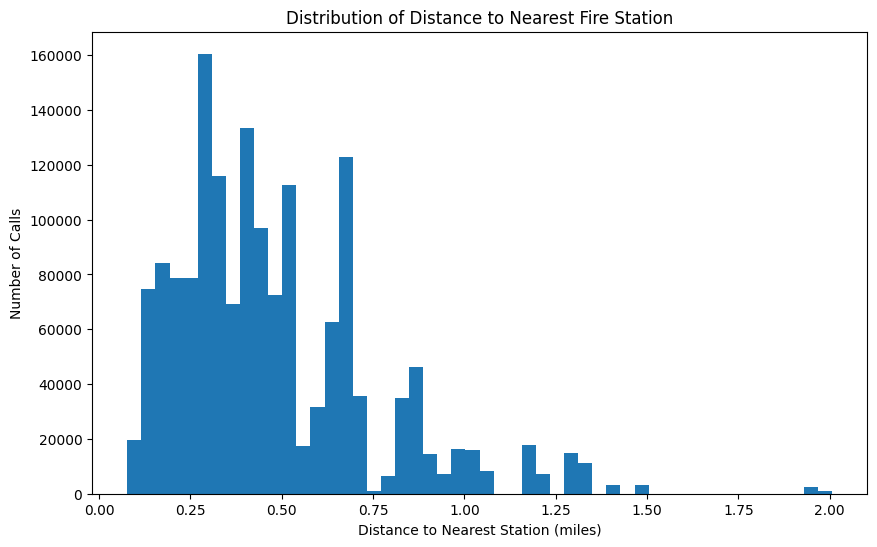

In [ ]:
# Visualize distance distribution
plt.figure(figsize=(10, 6))
plt.hist(main_df['closest_station_manhattan_miles'], bins=50)
plt.xlabel('Distance to Nearest Station (miles)')
plt.ylabel('Number of Calls')
plt.title('Distribution of Distance to Nearest Fire Station')
plt.show()


In [ ]:
from math import radians, sin, cos, sqrt, atan2

def haversine_miles(lat1, lon1, lat2, lon2):
    R = 3958.8 # Earth radius in miles
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# Compare Manhattan vs Haversine distances for a few calls
sample_distances = [haversine_miles(main_df.iloc[i]['latitude_of_call'],
                                    main_df.iloc[i]['longitude_of_call'],
                                    stations.iloc[closest_idx[i]]['latitude'],
                                    stations.iloc[closest_idx[i]]['longitude'])
                    for i in range(10)]

sample_distances


[0.26172710538601046,
 0.4153876083705568,
 0.20140563203678719,
 0.5239895568091756,
 0.503666226208895,
 0.7890647004339835,
 0.14996109874677524,
 0.4891393673943016,
 0.10207381243736338,
 0.4037081323198656]

# EMS 2025 Dataset - Column Reference

## Available Columns (XX total):
- **Incident Info:** incident_id, datetime, initial_type, severity, etc.
- **Location:** borough, zipcode, precinct, latitude, longitude
- **Response Times:** dispatch_response_sec, incident_response_sec, travel_time_sec
- **Weather:** temperture, precipitation, windspeed, weathercode
- **Station:** closest_station_name, closest_station_manhattan_miles
- **Time Features:** year, month, day, hour, week_day, is_weekend, is_rush_hour
- **Indicators:** held, reopened, standby, transferred

## Note:
All columns preserved. Team can select features during modeling phase.

In [ ]:
main_df.to_csv('../data/raw/ems_2025_merged.csv', index=False)

In [ ]:
# Add the feature engineering notebook
#git add src/feature_engineering.ipynb

# Commit with a descriptive message
#git commit -m "updates"

# Push to GitHub
#git push origin main

In [ ]:
main_df

,incident_id,datetime,initial_type,initial_severity,final_type,final_severity,assignment_time,valid_dispatch_response,dispatch_response_sec,activation_time,...,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,latitude_of_call,longitude_of_call,closest_station_name,closest_station_manhattan_miles
0,250010001,2025-01-01 00:00:12,STNDBY,8,STNDBY,8,2025-01-01T09:53:41.000,N,0,2025-01-01T09:57:09.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3.0,40.5771,-73.9881,Engine 318/Ladder 166,0.300912
1,250010003,2025-01-01 00:01:53,UNC,2,UNC,2,2025-01-01T00:02:06.000,Y,13,2025-01-01T00:02:43.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3.0,40.7506,-73.9971,Engine 34/Ladder 21,0.446225
2,250010004,2025-01-01 00:01:58,CARD,3,CARD,3,2025-01-01T00:01:58.000,Y,0,2025-01-01T00:01:58.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3.0,40.7590,-73.9899,Battalion 9/Engine 54/Ladder 4,0.280244
3,250010007,2025-01-01 00:03:42,ABDPN,5,ABDPN,5,2025-01-01T00:03:59.000,Y,17,2025-01-01T00:04:12.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3.0,40.8583,-73.9301,Engine 95/Ladder 36,0.712385
4,250010008,2025-01-01 00:04:36,STATEP,2,STATEP,2,2025-01-01T00:05:06.000,Y,30,2025-01-01T00:05:18.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3.0,40.8899,-73.8466,Battalion 15/Engine 63/Ladder 39,0.668752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616879,243664774,NaN,SICK,6,SICK,6,2024-12-31T21:38:16.000,Y,88,2024-12-31T21:41:13.000,...,NaN,NaN,NaN,NaN,NaN,NaN,40.8234,-73.9251,Squad 41,0.677753
1616880,243664776,NaN,RESPIR,4,RESPIR,4,2024-12-31T21:37:01.000,Y,4,2024-12-31T21:37:28.000,...,NaN,NaN,NaN,NaN,NaN,NaN,40.7066,-73.8091,Battalion 50/Engine 298/Ladder 127,0.325025
1616881,243664777,NaN,SICK,6,SICK,6,2024-12-31T21:37:58.000,Y,45,2024-12-31T21:38:19.000,...,NaN,NaN,NaN,NaN,NaN,NaN,40.8799,-73.9067,Engine 81/Ladder 46,0.361507
1616882,243664778,NaN,SICK,6,SICK,6,2024-12-31T21:37:18.000,Y,4,2024-12-31T21:37:44.000,...,NaN,NaN,NaN,NaN,NaN,NaN,40.7003,-73.8816,Engine 286/Ladder 135,0.326185
